In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

# Explore Iris Dataset

### How large is our dataset?

In [2]:
iris.data.shape

(150, 4)

### What are the different features?

In [3]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Which species do 0, 1, 2 correspond to in the labeled set?

In [4]:
label_names = iris.target_names
label_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

## Look at Some data

In [5]:
X = iris.data
X[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [6]:
y = iris.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Data Visualizations

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
from pandas.plotting import scatter_matrix
import numpy as np
%matplotlib inline

In [8]:
species_names = label_names[y]

In [9]:
df = pd.DataFrame(X, columns = feature_names)
df['species'] = y
df['species names'] = species_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species names'],
      dtype='object')

In [11]:
# DONE - Added clors to scatter matrix!

In [12]:
colors = ['red', 'green', 'blue']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b78f397b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4b7698f0b8>]], dtype=object)

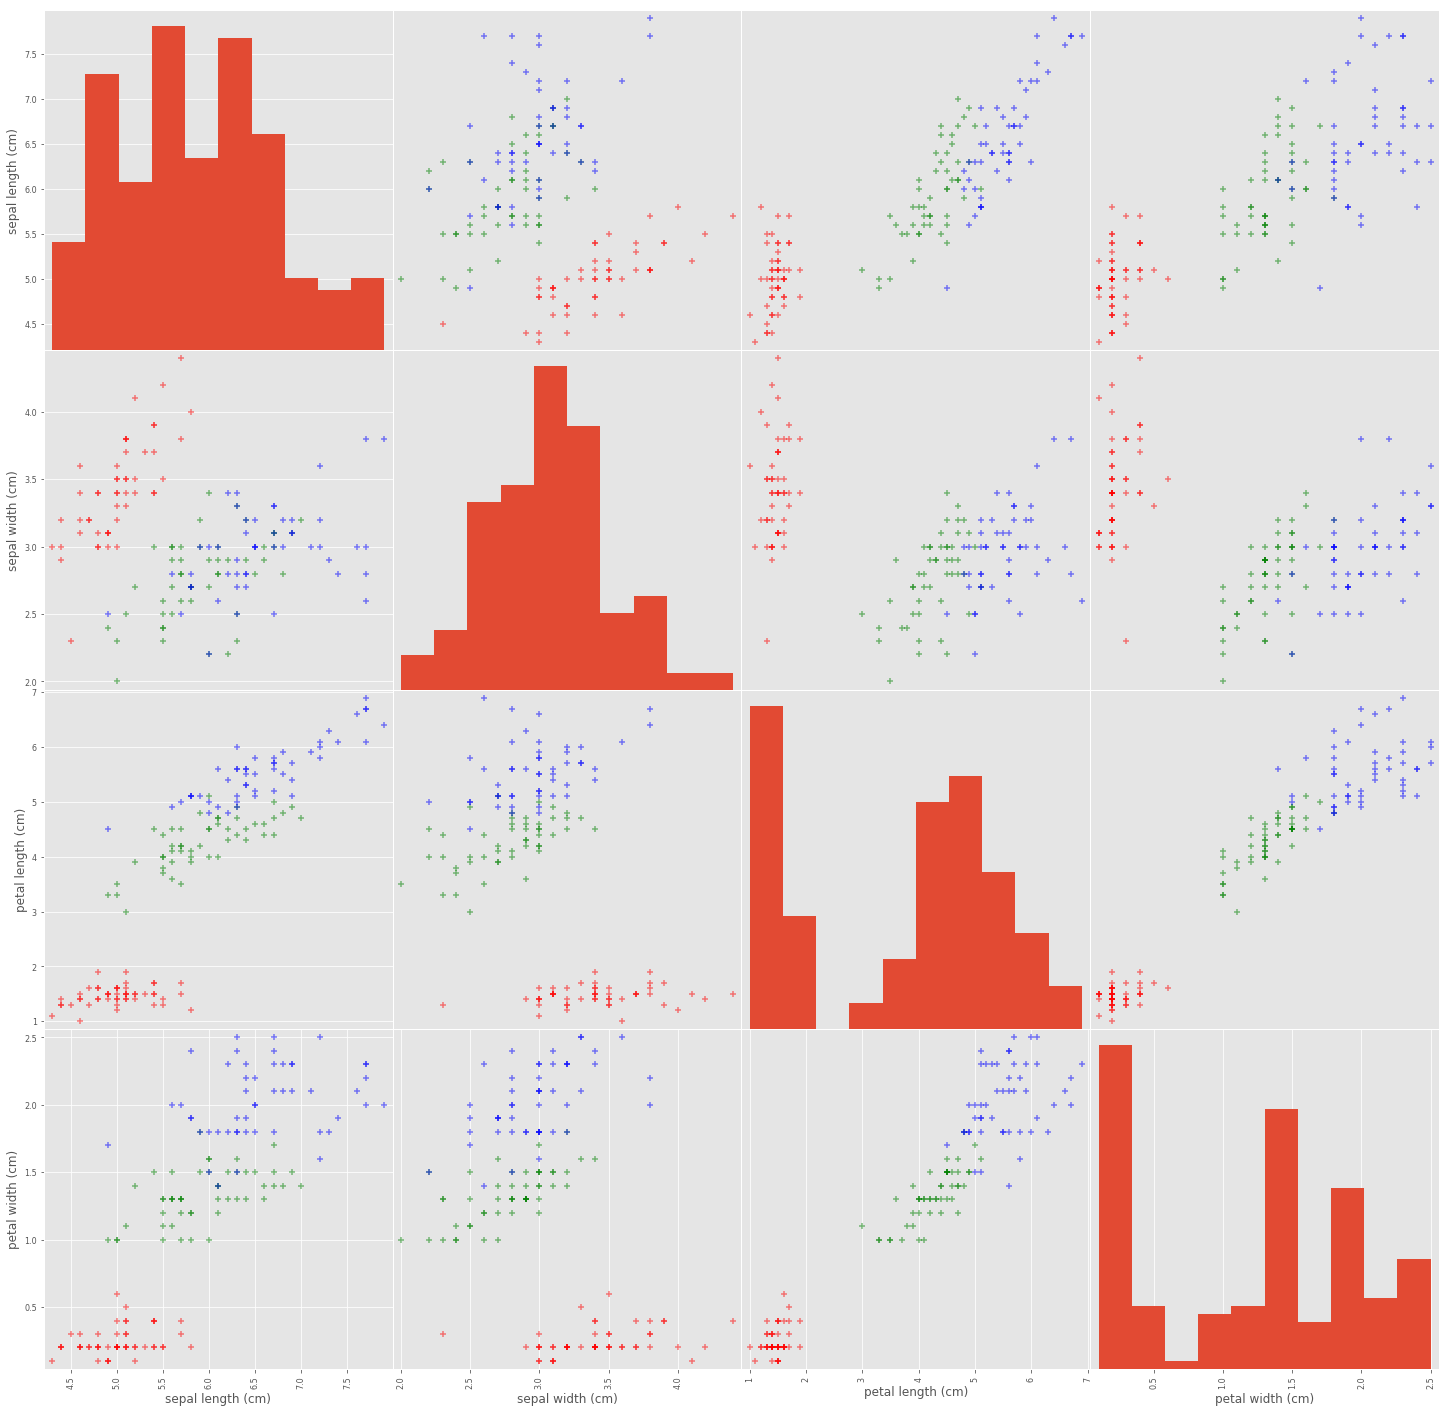

In [13]:
scatter_matrix(df.drop('species', axis=1), figsize=(25., 25.), marker = '+', c= df['species'].apply(lambda x: colors[x]))

## Radviz

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.



In [14]:
from pandas.plotting import radviz

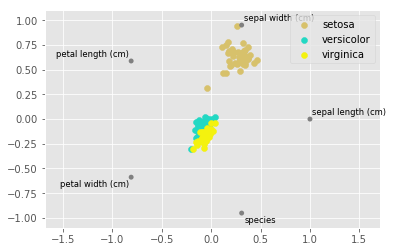

In [15]:
plt.figure()
radviz(df, 'species names')

### Data don't appear to be shuffled

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### What if we try to do a Train/ test split?

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Looks pretty random

In [19]:
y_train

array([1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0,
       0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2,
       2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2,
       1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0])

In [20]:
y_train.shape

(112,)

In [21]:
112/150 #This is roughly 75 %

0.7466666666666667

## Multinomial Logistic Regression with SkLearn 

In [3]:
from sklearn.linear_model import LogisticRegressionCV as LRCV, LogisticRegression as LR

In [4]:
LR?

In [5]:
LRCV?

In [23]:
model = LR()
modelCV = LRCV()

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
y_pred_probs = model.predict_proba(X_test)

In [26]:
y_pred_probs[:10]

array([[  5.61740546e-03,   3.71207116e-01,   6.23175479e-01],
       [  6.74853946e-01,   3.24775061e-01,   3.70992660e-04],
       [  8.39589354e-01,   1.60210973e-01,   1.99673234e-04],
       [  6.68519678e-04,   4.29579354e-01,   5.69752127e-01],
       [  1.24715946e-03,   4.24428645e-01,   5.74324195e-01],
       [  5.96666215e-02,   6.64540756e-01,   2.75792623e-01],
       [  4.52877118e-03,   3.78577656e-01,   6.16893573e-01],
       [  9.39620804e-01,   6.03713311e-02,   7.86502969e-06],
       [  3.16851819e-02,   8.54343149e-01,   1.13971669e-01],
       [  1.59613181e-03,   3.63773828e-01,   6.34630040e-01]])

In [27]:
len(y_pred_probs[:, 0])

38

In [28]:
len(y_test)

38

In [29]:
def get_y_pred_label(y_pred_probs, labels):
    '''
    Finds the most probable class from the y_pred matrix and assigns data point to that class
    '''
    y_pred = np.argmax(y_pred_probs, axis= 1)
    y_predicted_class = labels[y_pred]
    
    return y_pred, y_predicted_class

In [30]:
y_pred, y_pred_label = get_y_pred_label(y_pred_probs, label_names)
y_pred_label

array(['virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica'], 
      dtype='<U10')

In [31]:
y_pred

array([2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2,
       0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2])

## Compute Confusion Matrix for each Iris Class 

A [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) gives the count of instances based on the actual and predicted values of the target. For a binary classifier it looks like

|                    |Actual positive|Actual negative |
|--------------------|------------------|---------------|
| **Predicted positive**| true positive    | false positive|
| **Predicted negative**| false negative   | true negative |


*True* and *false* refer to whether you are correct.

*Positive* and *negative* refer to the **predicted** result.

A *type-I error* is a false positive (which I remember because that phrase is more common than false negative).

Accuracy $= \frac{TP+TN}{TP+TN+FP+FN}$

Sensitivity = Recall = TPR $= \frac{TP}{TP+FN}$

FPR $= \frac{FP}{TN+FP}$

Specificity $= \frac{TN}{TN+FP}$

Precision = PPV $= \frac{TP}{TP+FP}$

NPV $= \frac{TN}{TN+FN}$

![confusion matrix](Confusion_Matrix.png)

#### Setosa

In [32]:
label_names[0]

'setosa'

In [33]:
def calculate_threshold_values(prob, y, label_number):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    
    print ('prob_len: {}'.format(len(prob[:, label_number])))
    print ('y_test_len: {}'.format(len(y)))
    
    df = pd.DataFrame({'prob': prob[:, label_number], 'y': y})
    df.sort_values('prob', inplace=True)
    df1 = df.copy()
     
    actual_p = np.sum(df.y == label_number)
    actual_n = df.shape[0] - actual_p

    print ('actual_p: {}'.format(actual_p))
    print ('actual_n: {}'.format(actual_n))
    df['tn'] = (df.y != label_number).cumsum()
    df['fn'] = (df.y == label_number).cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df['recall'] = df.tp/(df.tp + df.fn)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df, label_number):
    
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr))
    ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel("fpr")
    ax.set_ylabel("tpr")
    ax.set_title('ROC - {}'.format(label_names[label_number]))
    
def plot_precision_recall(ax, df, label_number):
    ax.plot(df.tpr,df.precision)
    ax.set_xlabel("recall")
    ax.set_ylabel("precision")
    ax.set_title('Precision/Recall - {}'.format(label_names[label_number]))
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k')
    ax.set_xlim(xmin=0,xmax=1.1)
    ax.set_ylim(ymin=0,ymax=1.1)

This df shows what happens to my tpr, and fpr as I increase the threshold. Notice there are 38 data in my test set, 9 of which are actually Setosa. The other 29 are something else. If I consider the 'prob' column of my df as potential thresholds I can use, let's see how many of those actual positive and actual negative Setosa's I would measure correctly...

In [34]:
setosa_df = calculate_threshold_values(model.predict_proba(X_train), y_train, 0)

prob_len: 112
y_test_len: 112
actual_p: 38
actual_n: 74


In [35]:
# Looks like precission is rapidily increasing
setosa_df.head()

,prob,y,tn,fn,fp,tp,fpr,tpr,precision,recall
0,0.000021,2,1,0,73,38,0.986486,1.0,0.342342,1.0
1,0.000060,2,2,0,72,38,0.972973,1.0,0.345455,1.0
2,0.000094,2,3,0,71,38,0.959459,1.0,0.348624,1.0
3,0.000238,2,4,0,70,38,0.945946,1.0,0.351852,1.0
4,0.000240,2,5,0,69,38,0.932432,1.0,0.355140,1.0


In [36]:
# Looks like recall is rapidly decreasing
setosa_df.tail()

,prob,y,tn,fn,fp,tp,fpr,tpr,precision,recall
107,0.916894,0,74,34,0,4,0.0,0.105263,1.0,0.105263
108,0.917299,0,74,35,0,3,0.0,0.078947,1.0,0.078947
109,0.917705,0,74,36,0,2,0.0,0.052632,1.0,0.052632
110,0.928979,0,74,37,0,1,0.0,0.026316,1.0,0.026316
111,0.930329,0,74,38,0,0,0.0,0.000000,NaN,0.000000


prob_len: 112
y_test_len: 112
actual_p: 38
actual_n: 74
prob_len: 112
y_test_len: 112
actual_p: 41
actual_n: 71
prob_len: 112
y_test_len: 112
actual_p: 33
actual_n: 79


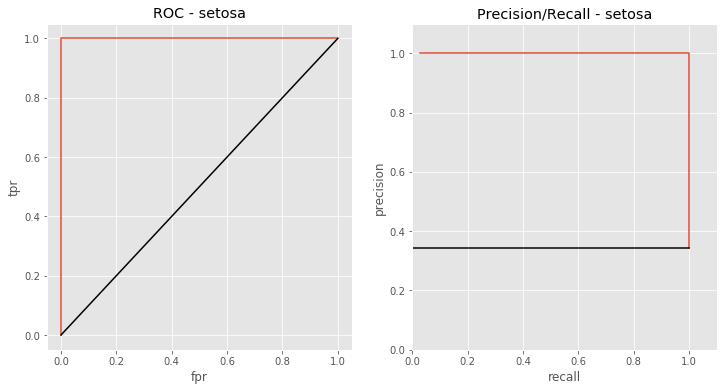

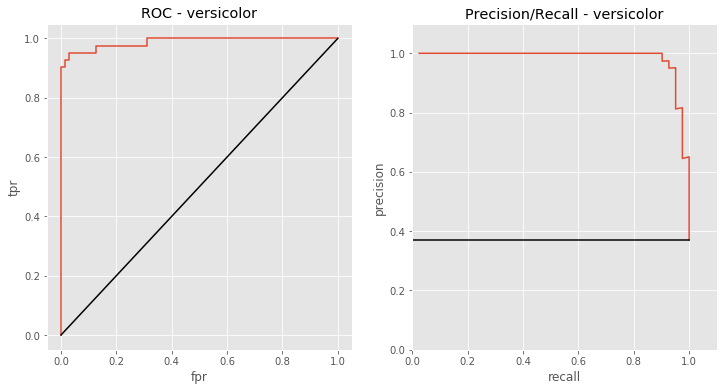

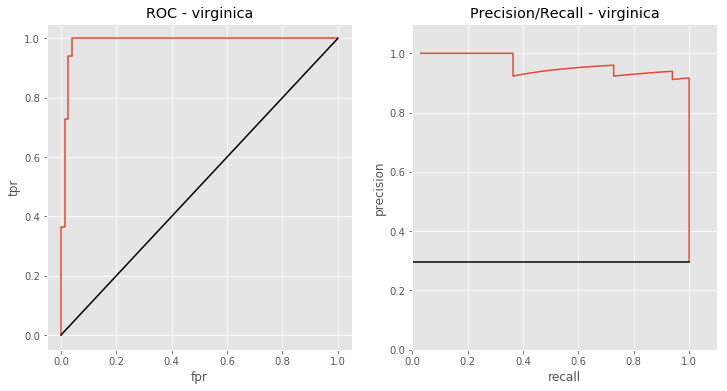

In [39]:
for i in range(len(label_names)):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
    df = calculate_threshold_values(model.predict_proba(X_train), y_train, i)
    plot_roc(ax0, df, i)
    plot_precision_recall(ax1, df, i)

# TODO 
"""
- finalize the actual prediction per sample 
- show the overall model performance 
-- ROC plot per species 
-- show precision / recall curve for each species 
-- include a note on how these actually differ / are related 
- save the final model to a file 
-- be able to load the model from a file and make predictions with it 


- break MNIST out into it's own notebook 

"""

#### TODO: Add a new section which does the *same* logistic regression over iris but does it in tenserflow 


# MNIST Dataset

In [ ]:
#TODO: 

"""
- Visualizations: 
-- Tenserboard 
-- Show three examples of misclassified digits that were close to the margin 
-- ROC plots 
"""

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)

## Multinomial Logistic Regression With Tensorflow

Notes about Tensorflow:
    * Competing Software: Theano Keras (can use tf with it), SKLearn, Torch, Caffe
    * Written in C++ on backend

In [ ]:
graph = tf.Graph()
with graph.as_default():
    
    # Variables
    batch_size = 128 # mini batch for SGF
    beta = 0.001 # regularization
    image_size = 28
    num_labels = 10
    
    # Input data. For the training dara, we use a placeholder that will be fed
    # at runtime with a training minibatch
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(mnist.validation.images)
    tf_test_dataset = tf.constant(mnist.test.images)
    
    # Weights and biases for output/logit layer
    w_logit = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
    b_logit = tf.Variable(tf.zeros([num_labels]))
    
    def model(data):
        '''
        Assembles the NN
        '''
        return tf.matmul(data, w_logit) + b_logit
    
    # Training Computations
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels= tf_train_labels)) 
    # Look up how to calculate softmax cross entropy explicitly
    regularized_loss = tf.nn.l2_loss(w_logit)
    total_loss = loss + beta * regularized_loss
    
    # Optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(total_loss)
    
    # Predictions for the training, validation, and test data
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))
    
    # TODO: Document the difference between keras and tflearn 
    

In [ ]:
def accuracy(prediction, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

In [ ]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
y = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 4]])
np.sum(np.argmax(x, 1) == np.argmax(y, 1))

Doing Stochastic Gradient Descent Here so we have small batch size, but we compensate by having more steps.

In [ ]:
num_steps = 50001
losses = []
train_accuracies = []
val_accuracies = []

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print ("Initialized")
    for step in range(num_steps):
        
        # Generate a minibatch
        batch_data, batch_labels = mnist.train.next_batch(batch_size)
        
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholdemaker node of the graph to be fed,
        # and the value is the numpy array to feed it
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict= feed_dict)
        
        losses.append(l)
        train_accuracy = accuracy(predictions, batch_labels)
        val_acc = accuracy(valid_prediction.eval(), mnist.validation.labels)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_acc)
        
        # Print our progress every 500 steps
        if (step % 500 == 0):
            print ("Minibatch loss at step %d: %f" % (step, l))
            print ("Minibatch accuracy: %.1f%%" % train_accuracy)
            print ("Validation accuracy: %.1f%%" % val_acc)
    print ("Test accuracy: %0.1f%%" % accuracy(test_prediction.eval(), mnist.test.labels))

In [2]:
import pandas as pd
pd.__version__

'0.20.1'

In [1]:
!which ipython

/home/amanda/anaconda2/bin/ipython
